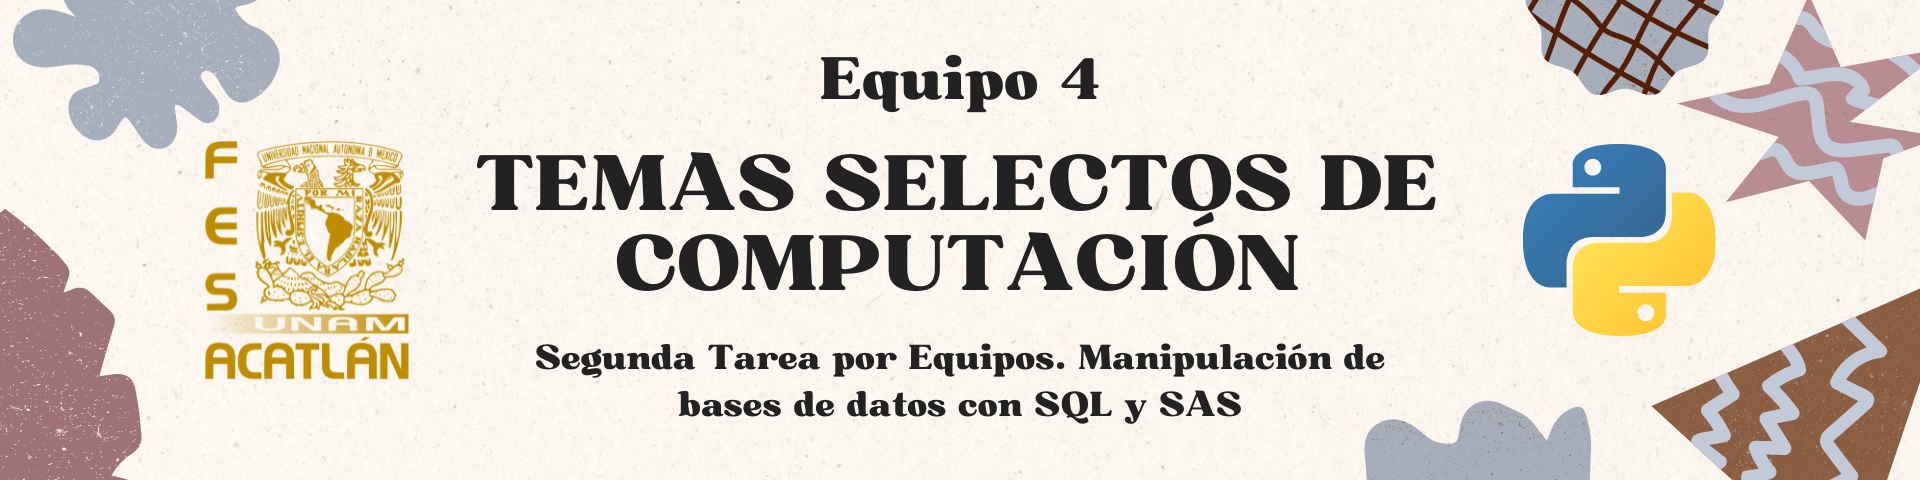

 ---
  ## Integrantes:
  ---
*  🦾 Díaz Sánchez David
*  ⛵ Hernández Vargas Héctor
*  ☔ López Armenta Kevin Josue
*  🎳 Martín Mejía Julio Yahir
*  🦋 Meza Torres Ana Yohali
*  🔥 Morales Ramirez Angel Francisco
*  💐 Salazar Pérez Perla Monserrat
*  💣 Zuñiga Galván Diego Antonio

---

# **Notas del Profesor**
Buen trabajo en lo general, se pudo haber hecho con la manipulación de la informacion en sql_lite igual que en SAS. El objetivo de la tarea es para que se familiaricen con las herramientas que estarán trabajando en el campo profesiona. Me gustaría verlos reordenando filas para las siguientes entregas.
Calificación: 8.5

Parte 1.
Tomando como referencia el Jupyter Notebook de 1_SQL_2024-I.ipynb para replicar (en Colab) lo visto en clase, deberán seguir los pasos vistos en clase para relacionar dos o más tablas e ingestarlas en una base de datos de SQL Lite, es decir; como se vio en clase deberan utilizar las funciones de insertar datos externos en SQL Lite, generar la unión de tablas y generar reportes. A continuación la descripción de pasos y los requerimientos de la información que deberán buscar en páginas libres.

Conseguir una base de datos separada en al menos 3 archivos excel o csv (revisen la grabación de la clase, ahí se dieron los tips para buscar datos de sql)
Las tablas del punto anterior, deben tener cuando menos 50 registros y no más de 200.
Las tablas deben poderse unir al menos dos de ellas
Deberan construir al menos una tabla resultante de la union de dos tablas
Deben construir un reporte que ocupe la información de al menos dos tablas
Deberán realizar al menos 4 consultas a la tabla reporte con las funciones de Like, ">,<,=".
Presentar sus conclusiones, y de ser posible generen un apoyo visual

Nota:  todos los procedimientos y comentarios se entregan en un colab, los archivos texto (csv, excel, etc.) deberán de estar disponibles para replicar sus procedimientos, de preferencia compartan los documentos por GitHub.

Parte 2. Se entrega como una celda de texto en el Colab donde desarrollaron los pasos en SQL Lite

Con el uso de SAS y como se reviso en clase, deberán regenerar sus pasos utilizando los procedimientos propios de SAS o bien usando un "PROC SQL", para la generación de reportes estan habilidados para realizarlos con el uso de comandos de SAS o SQL.

Nota: como en SAS Acadey se complica compartir archivos, deberán importar los datos desde el programa de SAS, es decir deberán pegar los datos en un procedimiento "DATA". Se solicita hacerlo de esta forma para que el profesor pueda validar sus resultados.

El procedimiento que replica lo desarrollado en SAS lo deberán incluir en una línea de código en su colab al final de su tarea.


# PARTE 1
## Manipulación de Bases de Datos en SQLite

---


---




In [ ]:
# Importamos librerías para el manejo de datos
import numpy as np
import pandas as pd

# Librería para graficar
from matplotlib import pyplot as plt

# Importamos librería para el manejo de Base de Datos
import sqlite3



### 1.    Conseguimos una base de datos separada por 3 tablas

La base de datos 'RacesDB.db' esta separada por las tablas 'CIRCUITOS', 'CLASIFICACION' y 'EQUIPOS'.


---




In [ ]:
# Subimos los datos a Github y extraemos la URL "raw" para poder descargarlos fácilmente

ulr_circ = "https://github.com/DavidDiaz24/TSC/raw/refs/heads/main/tabla%20circuitos.xlsx"
url_clas = "https://github.com/DavidDiaz24/TSC/raw/refs/heads/main/tabla%20clasificacion.xlsx"
url_equi = "https://github.com/DavidDiaz24/TSC/raw/refs/heads/main/tabla%20equipos.xlsx"


# Leemos los archivos y los guardamos en dataframes

tabla_circ = pd.read_excel(ulr_circ)
tabla_clas = pd.read_excel(url_clas)
tabla_equi = pd.read_excel(url_equi)




---





### 2.   Las tablas estan entre el número de registros permitido

Es decir están entre 50 y 200 registros.


---




In [ ]:
print(f"Los registros para las tablas son: \n 'CIRCUITOS':\t\t{tabla_circ.count()['circuitId']}\n 'CLASIFICACION':\t{tabla_clas.count()['qualifyId']}\n 'EQUIPOS':\t\t{tabla_equi.count()['constructorId']}")

Los registros para las tablas son: 
 'CIRCUITOS':		77
 'CLASIFICACION':	199
 'EQUIPOS':		198




---





### 3.   Las tablas 'EQUIPOS' y 'CLASIFICACION' se pueden relacionar ya que comparten el campo de [constructorId]

En la tabla 'EQUIPOS' esta será Primary Key y en la tabla 'CLASIFICACION' será  Foreign Key.


---




In [ ]:
# En esta tabla será Primary Key

tabla_equi['constructorId']

,constructorId
0,1
1,2
2,3
3,4
4,5
...,...
193,196
194,197
195,198
196,199


In [ ]:
 # En esta será Foreign Key

 tabla_clas['constructorId']

,constructorId
0,1
1,2
2,1
3,6
4,2
...,...
194,2
195,9
196,5
197,9




---



### Creamos la base de datos 'RacesDB.db' y las tablas que contendrán los datos iniciales.


---



In [ ]:
# Creamos la Base de Datos de carreras 'RacesDB'
# conn es el objeto de conexión activa a la base de datos
# connect intenta conectar con la base de datos 'RacesBD' y como no existía antes se crea la base de datos
conn = sqlite3.connect('RacesDB.db')

# La base de datos quedará guardada dentro de los archivos temporales del archivo py
# crea un cursor que permitirá realizar acciones/comandos con la base de datos
c = conn.cursor()


# El comando execute() nos ayuda a realizar comandos del estilo SQL
# Almacenaremos en las tablas los datos que investigamos para realizar la tarea

# Create table - EQUIPOS
c.execute('''CREATE TABLE EQUIPOS
             ([constructorId] INTEGER PRIMARY KEY,[constructorRef] text, [name] text,[nationality] text , [url] text)''')

# Create table - CLASIFICACIÓN
c.execute('''CREATE TABLE CLASIFICACION
             ([qualifyId] INTEGER PRIMARY KEY,[raceId] integer,[driverId] integer, [constructorId] integer, [number] integer, [position] integer, [q1] real, [q2] real, [q3] real)''')

# Create table - CIRCUITOS
c.execute('''CREATE TABLE CIRCUITOS
             ([circuitId] INTEGER PRIMARY KEY, [circuitRef] text, [name] text, [location] text, [country] text, [url] text)''')

conn.commit()

Transformamos los datos de los campos para poder usarlos como valores numéricos y no como strings.

In [ ]:
# Observamos los campos de la tabla
tabla_clas.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [ ]:
# Como vemos hay un problema para los campos [q1], [q2], [q3] ya que queremos operar con ellos,
# por lo que hay que modificar los datos antes de insertarlos a las tablas de la base de datos.

# Creamos una función que transforma a formato numérico los valores de los campos antes mencionados

def convertir_a_seconds(time_str):
    if time_str == '\\N':  # Verificamos si es un valor nulo
        return None
    else:
        minutos, segundos = time_str.split(':')
        segundos, milisegundos = segundos.split('.')
        total_seconds = int(minutos) * 60 + int(segundos) + int(milisegundos) / 1000
        return total_seconds


# Aplicamos la función a los campos que la necesitan en una línea de código con applymap()

tabla_clas[["q1", "q2", "q3"]] = tabla_clas[["q1", "q2", "q3"]].applymap(convertir_a_seconds)

<ipython-input-8-d3921fd406fb>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_clas[["q1", "q2", "q3"]] = tabla_clas[["q1", "q2", "q3"]].applymap(convertir_a_seconds)


In [ ]:
# observamos que ya podemos trabajar con ellos como números reales y no como strings
# Esto nos ayudará a hacer consultas considerando este campo

tabla_clas.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,86.572,85.187,86.714
1,2,18,9,2,4,2,86.103,85.315,86.869
2,3,18,5,1,23,3,85.664,85.452,87.079
3,4,18,13,6,2,4,85.994,85.691,87.178
4,5,18,2,2,3,5,85.960,85.518,87.236


In [ ]:
# Accedemos a la base de datos e insertamos los datos de las tablas dentro de ella

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()

# Insertamos los datos de la tabla 'CLASIFICACION' en la base de datos
tabla_clas.to_sql('CLASIFICACION', conn, if_exists='append', index = False)

# Insertamos los datos de la tabla 'CIRCUITOS' en la base de datos
tabla_circ.to_sql('CIRCUITOS', conn, if_exists='append', index = False)

# Insertamos los datos de la tabla 'EQUIPOS' en la base de datos
tabla_equi.to_sql('EQUIPOS', conn, if_exists='append', index = False)

# Guardamos los cambios
conn.commit()
conn.close()

### Verificamos que las tablas hayan sido llenadas con los datos de los dataframes

In [ ]:
#Accedemos a la base de datos

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()

# Ejecutamos una consulta para la tabla 'CLASIFICACION'

c.execute('''SELECT * FROM CLASIFICACION''')
pd.DataFrame(c.fetchall()).head()

,0,1,2,3,4,5,6,7,8
0,1,18,1,1,22,1,86.572,85.187,86.714
1,2,18,9,2,4,2,86.103,85.315,86.869
2,3,18,5,1,23,3,85.664,85.452,87.079
3,4,18,13,6,2,4,85.994,85.691,87.178
4,5,18,2,2,3,5,85.960,85.518,87.236


In [ ]:
# Repetimos el proceso para la tabla 'EQUIPOS'

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()

c.execute('''SELECT * FROM EQUIPOS''')
pd.DataFrame(c.fetchall()).head()

,0,1,2,3,4
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [ ]:
# Finalmente para la tabla 'CIRCUITOS'

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()

c.execute('''SELECT * FROM CIRCUITOS''')
pd.DataFrame(c.fetchall()).head()

,0,1,2,3,4,5
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,http://en.wikipedia.org/wiki/Istanbul_Park




---





### 4.   Creamos tablas resultantes de unir las tablas predefinidas



---



In [ ]:
#Consultamos la lista de circuitos donde ha participado mclaren
conn = sqlite3.connect('RacesDB.db')# Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos SQL
# Ejecutamos la consulta para seleccionar los nombres únicos 'DISTINCT' de los circuitos 'name',
# junto con su ubicación 'location' y país 'country' desde la tabla 'circuitos'
# Realizamos con un JOIN con la tabla 'clasificacion' usando la columna 'circuitId' en 'circuitos' y 'raceId' en 'clasificacion',
# y también con un JOIN con la tabla 'equipos' a través de 'constructorId'
# Filtramos los resultados para obtener solo aquellos donde el 'constructorId' sea igual a 1
c.execute( '''CREATE TABLE circuitos_mclaren AS
   SELECT DISTINCT cir.name, cir.location, cir.country
   FROM circuitos cir
   JOIN clasificacion c ON cir.circuitId = c.raceId
   JOIN equipos e ON e.constructorId = c.constructorId
   WHERE e.constructorId = 1
   ''')

conn.commit()

In [ ]:
c = conn.cursor()

c.execute('''SELECT * FROM circuitos_mclaren''')

# Convertimos el resultado de la consulta en un DataFrame
# El DataFrame tendrá tres columnas: 'name', 'location' y 'country'
pd.DataFrame(c.fetchall(),columns=['name','location','country'])

,name,location,country
0,Autódromo José Carlos Pace,São Paulo,Brazil
1,Indianapolis Motor Speedway,Indianapolis,USA
2,Nürburgring,Nürburg,Germany
3,Autodromo Enzo e Dino Ferrari,Imola,Italy
4,Suzuka Circuit,Suzuka,Japan
5,Yas Marina Circuit,Abu Dhabi,UAE
6,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina
7,Circuito de Jerez,Jerez de la Frontera,Spain
8,Autódromo do Estoril,Estoril,Portugal


In [ ]:
#La tabla muestra la cantidad de veces que un equipo ha logrado el top1,top2,top3 y ordenado respecto al equipo que ha quedado mas veces en top1

conn = sqlite3.connect('RacesDB.db')
c= conn.cursor()
c.execute('''
    CREATE TABLE top3_equipos AS
    SELECT e.name AS equipo,
        SUM(CASE WHEN CQ.position = 3 THEN 1 ELSE 0 END) AS total_top3,
        SUM(CASE WHEN CQ.position = 2 THEN 1 ELSE 0 END) AS total_top2,
        SUM(CASE WHEN CQ.position = 1 THEN 1 ELSE 0 END) AS total_top1
    FROM CLASIFICACION CQ
    JOIN Equipos e ON CQ.constructorId = e.constructorId
    GROUP BY e.name
    Having total_top3 > 0 OR total_top2 > 0 OR total_top1 > 0
    ORDER BY total_top1 DESC
''')
conn.commit()

In [ ]:
conn = sqlite3.connect('RacesDB.db')
c= conn.cursor()
c.execute('''SELECT * FROM top3_equipos''')
pd.DataFrame(c.fetchall(),columns=['equipo','total_top3','total_top2','total_top1'])

,equipo,total_top3,total_top2,total_top1
0,Ferrari,3,5,5
1,McLaren,7,1,4
2,BMW Sauber,0,2,1
3,Renault,0,1,0
4,Red Bull,0,1,0




---





### 5.   Creamos el reporte resultante de la union de las tres tablas de nuestra base de datos

Estas tendrán la información de cada carrera, el tiempo promedio por pilotos en los diferentes circuitos donde corrieron.

Solo ponemos los registros donde no hay datos nulos para poder hacer el promedio de los tiempos en las diferentes carreras. también obtenemos el tiempo máximo y tiempo minimo por cada una de las carreras.

También agregamos datos como la marca constructora para poder saber cuales de las marcas son más exitosas en las diferentes consultas que realicemos.

Agregamos los datos de la carrera, Nombre del Circuito, su Cuidad y País.

Esta tabla reporte recaba información detallada de las 3 tablas de nuestra base de datos.


---



In [ ]:
conn = sqlite3.connect('RacesDB.db')
# Creamos el cursor para interactuar con SQLite


# Realizamos la consulta la cual será la unión de nuestras 3 tablas, traera metricas como el promedio, máximo y mínimo,
# Nos permitirá realizar consultas a través de estos campos

c.execute( ''' CREATE TABLE Reporte_tiempo_promedio_pilotos_y_circuitos AS
  SELECT c.qualifyId as ID , c.driverId as ID_Conductor, e.constructorId , c.raceId as Carrera, e.name as Nombre, e.nationality as Pais ,
   c.position as Posicion,cir.name as Nombre_Circuito, cir.location as Ciudad_Circuirto,cir.country as Pais_Circuito,  AVG((c.q1 + c.q2 + c.q3)/3) as Tiempo_Promedio,
   CASE
        WHEN c.q1 >= c.q2 AND c.q1 >= c.q3 THEN c.q1
        WHEN c.q2 >= c.q1 AND c.q2 >= c.q3 THEN c.q2
        ELSE c.q3
    END as Maximo,
      CASE
        WHEN c.q1 <= c.q2 AND c.q1 <= c.q3 THEN c.q1
        WHEN c.q2 <= c.q1 AND c.q2 <= c.q3 THEN c.q2
        ELSE c.q3
    END as Minimo
   FROM EQUIPOS e
   JOIN CLASIFICACION c ON e.constructorId = c.constructorId
   JOIN CIRCUITOS cir ON c.raceId = cir.circuitId
   WHERE c.q1 IS NOT NULL and c.q2 IS NOT NULL and c.q3 IS NOT NULL
   GROUP BY  c.driverId, c.raceId
   ORDER BY  c.raceId, c.position, Tiempo_promedio
   ''')
conn.commit()

In [ ]:
c = conn.cursor()

c.execute('''
    SELECT * FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    ''')

pd.DataFrame(c.fetchall(),columns=['ID','ID_Conductor','constructorId','Carrera','Nombre','Pais','Posicion','Nombre_Circuito','Ciudad_Circuirto','Pais_Circuito','Tiempo_Promedio', 'Tiempo_Maximo','Tiempo_Minimo']).head()

,ID,ID_Conductor,constructorId,Carrera,Nombre,Pais,Posicion,Nombre_Circuito,Ciudad_Circuirto,Pais_Circuito,Tiempo_Promedio,Tiempo_Maximo,Tiempo_Minimo
0,1,1,1,18,McLaren,British,1,Autódromo José Carlos Pace,São Paulo,Brazil,86.157667,86.714,85.187
1,2,9,2,18,BMW Sauber,German,2,Autódromo José Carlos Pace,São Paulo,Brazil,86.095667,86.869,85.315
2,3,5,1,18,McLaren,British,3,Autódromo José Carlos Pace,São Paulo,Brazil,86.065000,87.079,85.452
3,4,13,6,18,Ferrari,Italian,4,Autódromo José Carlos Pace,São Paulo,Brazil,86.287667,87.178,85.691
4,5,2,2,18,BMW Sauber,German,5,Autódromo José Carlos Pace,São Paulo,Brazil,86.238000,87.236,85.518




---





### 6.   Realizamos consultas



In [ ]:
#Consultamos los equipos cuyo país comience con "Ger"

conn = sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos SQL
c.execute( '''
    SELECT Nombre, Pais
FROM Reporte_tiempo_promedio_pilotos_y_circuitos
WHERE Pais LIKE 'Ger%'
GROUP BY Nombre, Pais
    ''')
# Convertimos el resultado de la consulta en un DataFrame
# El DataFrame tendrá dos columnas: 'nombre','pais'
pd.DataFrame(c.fetchall(),columns=['Nombre','Pais'])

,Nombre,Pais
0,BMW Sauber,German


In [ ]:
#Consultamos con '>' para filtrar los equipos con un tiempo promedio mayor a 90 segundos
conn = sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos
c.execute( '''
    SELECT Nombre, Tiempo_Promedio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Tiempo_Promedio > 90
    ORDER BY Tiempo_Promedio DESC
    ''')
# Convertimos el resultado de la consulta en un DataFrame
# El DataFrame tendrá dos columnas: 'nombre','Tiempo'
pd.DataFrame(c.fetchall(),columns=['Nombre','Tiempo'])

,Nombre,Tiempo
0,Toyota,96.849000
1,Renault,96.524333
2,Red Bull,95.805333
3,BMW Sauber,95.777333
4,BMW Sauber,95.710000
5,Toyota,95.625333
6,McLaren,95.576000
7,McLaren,95.533000
8,Ferrari,95.354333
9,Ferrari,95.169000


In [ ]:
#Consultamos el tiempo promedio por Equipo en Brasil

conn=sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c=conn.cursor()# Creamos un cursor para ejecutar comandos SQL
#Ejecutamos la colsulta para seleccionar nombre y promedio del tiempo promedio por carrera
c.execute( '''
    SELECT Nombre, AVG(Tiempo_Promedio)
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Pais_Circuito='Brazil'
    GROUP BY Nombre
    ORDER BY AVG(Tiempo_Promedio) DESC
    ''')
#Convertimos el resultado de la consulta en un DataFrame
#El DataFRame tendrá dos columnas: 'Nombre', 'Tiempo promedio'
data = pd.DataFrame(c.fetchall(),columns=['Nombre', 'Tiempo promedio'])
data

,Nombre,Tiempo promedio
0,Toyota,87.288500
1,Red Bull,87.161667
2,Williams,87.013667
3,Ferrari,86.287667
4,BMW Sauber,86.166833
5,McLaren,86.111333


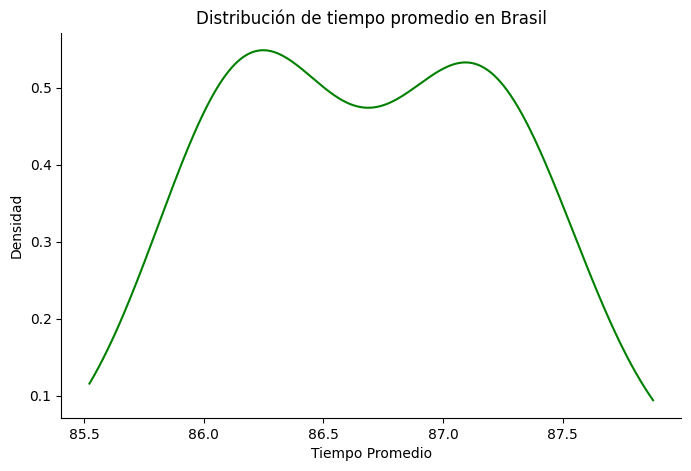

In [ ]:
data['Tiempo promedio'].plot(kind='density', figsize=(8, 5), color = "green" , title='Tiempo promedio')

plt.xlabel('Tiempo Promedio')
plt.ylabel('Densidad')
plt.title('Distribución de tiempo promedio en Brasil')

plt.gca().spines[['top', 'right']].set_visible(False)

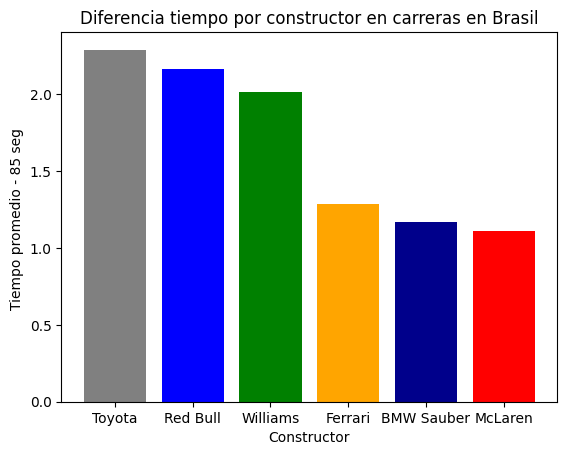

In [ ]:
conn=sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c=conn.cursor()# Creamos un cursor para ejecutar comandos SQL
#Ejecutamos la colsulta para seleccionar nombre y promedio del tiempo promedio por carrera
c.execute( '''
    SELECT Nombre, AVG(Tiempo_Promedio)
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Pais_Circuito='Brazil'
    GROUP BY Nombre
    ORDER BY AVG(Tiempo_Promedio) DESC
    ''')
resultados=c.fetchall()# Obtenemos los resultados de la consulta
conn.close()# Cerramos la conexión a la base de datos
nombre, tiempo_promedio=zip(*resultados)

colores = ['gray', 'blue', 'green', 'orange', "darkblue", "red"]

plt.bar(nombre, tuple(x -85 for x in tiempo_promedio), color=colores)
plt.xlabel('Constructor')
plt.ylabel('Tiempo promedio - 85 seg ')
plt.title('Diferencia tiempo por constructor en carreras en Brasil')
plt.show()# Mostramos el gráfico

In [ ]:
# Consultamos para calcular el promedio de tiempo por país

conn = sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos
c.execute( '''
    SELECT Pais, AVG(Tiempo_Promedio) as Promedio_Tiempo
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    GROUP BY Pais
    ORDER BY Promedio_Tiempo ASC
    ''')
# Convertimos el resultado de la consulta en un DataFrame
# El DataFrame tendrá dos columnas: 'nombre','Tiempo'
pd.DataFrame(c.fetchall(),columns=['Pais','Promedio'])

,Pais,Promedio
0,Austrian,82.532067
1,Italian,82.855825
2,French,83.207700
3,British,83.929587
4,German,85.103711
5,Japanese,85.767778


In [ ]:
# Consultamos con MIN y MAX para obtener el tiempo más rápido y más lento en el circuito Autódromo José Carlos Pace

conn = sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos
c.execute( '''
    SELECT Nombre_Circuito, MIN(Tiempo_Promedio) as Tiempo_Minimo, MAX(Tiempo_Promedio) as Tiempo_Maximo
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Nombre_Circuito = 'Autódromo José Carlos Pace'
    GROUP BY Nombre_Circuito
    ''')

# Convertimos el resultado de la consulta en un DataFrame
# El DataFrame tendrá tres columnas: 'Circuito','Tiempo mas rapido','Tiempo mas lento'
pd.DataFrame(c.fetchall(),columns=['Circuito','Tiempo mas rapido','Tiempo mas lento'])

,Circuito,Tiempo mas rapido,Tiempo mas lento
0,Autódromo José Carlos Pace,86.065,87.558667


In [ ]:
# Consultamos el equipo y su nacionalidad que tiene el mejor tiempo promedio

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute( '''
    SELECT Nombre, Pais, Tiempo_Promedio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Tiempo_Promedio =(
        SELECT MAX(Tiempo_Promedio)
        FROM Reporte_tiempo_promedio_pilotos_y_circuitos
        )
    ''')
pd.DataFrame(c.fetchall(),columns=['Equipo', 'Nacionalidad', 'Tiempo'])

,Equipo,Nacionalidad,Tiempo
0,Toyota,Japanese,96.849


In [ ]:
# Consultamos los cinco equipos con mejores posiciones que tengan un tiempo promedio superior a 86

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute('''
    SELECT Nombre, Posicion, Tiempo_Promedio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Posicion <= 5
    AND Tiempo_Promedio > 86
    ORDER BY Tiempo_Promedio DESC
    LIMIT 5
''')
pd.DataFrame(c.fetchall(),columns=['Nombre', 'Posición', 'Tiempo_Promedio'])

,Nombre,Posición,Tiempo_Promedio
0,Toyota,5,95.625333
1,McLaren,4,95.576000
2,McLaren,3,95.533000
3,Ferrari,2,95.354333
4,Ferrari,1,95.169000


In [ ]:
# Consultamos los circuitos en los que el Equipo Ferrari terminó en la posición no. 1

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute( '''
    SELECT Nombre_Circuito
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Posicion like "%1%"
    AND  Nombre like "%Ferrari%"
    ''')
pd.DataFrame(c.fetchall(),columns=["Nombre del Circuito"])

,Nombre del Circuito
0,Indianapolis Motor Speedway
1,Autodromo Enzo e Dino Ferrari
2,Suzuka Circuit
3,Autódromo Juan y Oscar Gálvez


In [ ]:
# Consultamos los equipos que terminaron en el podio en los circuitos que se encuentran en la ciudad de Buenos Aires

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute( '''
    SELECT  Nombre
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Posicion < 4
    AND Ciudad_Circuirto  like "%Buenos Aires%"
    ''')
pd.DataFrame(c.fetchall(),columns=["Equipo"])

,Equipo
0,Ferrari
1,Ferrari
2,McLaren


In [ ]:
# Consultamos los países que más veces han estado en el podio

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute('''
    SELECT Pais, COUNT(Posicion) AS Veces_En_El_Podio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Posicion <= 3
    GROUP BY Pais
    ORDER BY Veces_En_El_Podio DESC
  ''')
pd.DataFrame(c.fetchall(),columns=['Nacionalidad', 'Veces_En_El_Podio'])

,Nacionalidad,Veces_En_El_Podio
0,Italian,11
1,British,11
2,German,3
3,French,1
4,Austrian,1


In [ ]:
# Consultamos los equipos de nacionalidad británica que tienen un tiempo promedio menor a 86 y que han terminado en la primera posición

conn = sqlite3.connect('RacesDB.db')
c = conn.cursor()
c.execute( '''
    SELECT Nombre, Tiempo_Promedio, Posicion
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Pais Like '%Brit%'
    AND Tiempo_Promedio < 86
    AND Posicion = 1
    ''')
pd.DataFrame(c.fetchall(),columns=['Equipo', 'Tiempo_Promedio', 'Posición'])

,Equipo,Tiempo_Promedio,Posición
0,McLaren,77.276333,1
1,McLaren,80.201000,1
2,McLaren,75.162333,1


In [ ]:
# Consultamos los equipos que hayan competido en Brasil y cuyo tiempo promedio sea mayor que el tiempo promedio de todos los equipos que compitieron en Portugal

conn=sqlite3.connect('RacesDB.db')
c=conn.cursor()
c.execute('''
    SELECT Nombre,Tiempo_Promedio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Pais_Circuito = 'Brazil'
    AND Tiempo_Promedio > (
        SELECT AVG(Tiempo_Promedio)
        FROM Reporte_tiempo_promedio_pilotos_y_circuitos
        WHERE Pais_Circuito = 'Portugal'
        )
        ORDER BY Tiempo_Promedio
    ''')
pd.DataFrame(c.fetchall(),columns=['Equipo', 'Tiempo'])

,Equipo,Tiempo
0,McLaren,86.065000
1,BMW Sauber,86.095667
2,McLaren,86.157667
3,BMW Sauber,86.238000
4,Ferrari,86.287667
5,Williams,87.013667
6,Toyota,87.018333
7,Red Bull,87.161667
8,Toyota,87.558667


In [ ]:
#Consultar los equipos cuyo tiempo minimo haya sido menor que el tiempo minimo del Equipo "Red Bull"

conn=sqlite3.connect('RacesDB.db')
c=conn.cursor()
c.execute('''
    SELECT Nombre,Minimo
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Minimo < (
        SELECT MIN(Minimo)
        FROM Reporte_tiempo_promedio_pilotos_y_circuitos
        WHERE Nombre  LIKE 'Red%'
    )
    order by Minimo
    ''')
pd.DataFrame(c.fetchall(),columns=['Equipo','Tiempo'])

,Equipo,Tiempo
0,McLaren,74.603
1,Ferrari,74.747
2,McLaren,74.855
3,Renault,74.943
4,Ferrari,74.949
5,Ferrari,75.024
6,BMW Sauber,75.109
7,Toyota,75.122
8,Ferrari,75.133
9,McLaren,75.293


In [ ]:
#Consultamos las carreras en que Ferrari tuvo un tiempo promedio menor a McLauren

conn=sqlite3.connect('RacesDB.db') # Importamos la librería sqlite3 para trabajar con la base de datos de SQLite
c = conn.cursor()# Creamos un cursor para ejecutar comandos SQL
#Ejecutamos la consulta para seleccionar las columnas carrera, nombre circuito y tiermpo promedio
#Filtramos las columnas cuando el tiempo promedio de ferrari sea memor que el tiempo promedio de McLauren
c.execute( '''
    SELECT Carrera, Nombre_Circuito, Tiempo_Promedio
    FROM Reporte_tiempo_promedio_pilotos_y_circuitos
    WHERE Nombre='Ferrari'
    AND Tiempo_Promedio < (SELECT Tiempo_Promedio FROM Reporte_tiempo_promedio_pilotos_y_circuitos WHERE Nombre='McLaren')
    ''')
#Convertimos el resultado de la consulta en un DataFrame
#El DataFRame tendrá dos tres columnas: 'Carrera', 'Nombre de circuito', 'Tiempo promedio'
pd.DataFrame(c.fetchall(),columns=['Carrera', 'Nombre de circuito', 'Tiempo promedio'])

,Carrera,Nombre de circuito,Tiempo promedio
0,21,Autodromo Enzo e Dino Ferrari,81.099333
1,21,Autodromo Enzo e Dino Ferrari,81.390000
2,24,Yas Marina Circuit,77.800000
3,24,Yas Marina Circuit,77.877333
4,25,Autódromo Juan y Oscar Gálvez,75.581000
5,25,Autódromo Juan y Oscar Gálvez,75.518333
6,26,Circuito de Jerez,80.682333
7,26,Circuito de Jerez,81.355667
8,27,Autódromo do Estoril,75.175667
9,27,Autódromo do Estoril,75.513000




---



Para poder importar los datos a SAS de una manera más cómoda vamos a pasar los datos a strings y bajarlos a un bloc de notas para subirlos de la manera vista en clase en SAS.

In [ ]:
 # Creamos una función que pasa todos los datos de los DataFrames a un string
 # Separamos por espacios entre cada una de las columnas de los registros
 # Además para los datos que de por sí tienen espacios los reemplazamos por guiones bajos "_", esto para evitar desfazar los datos en SAS
 # Guardamos el string resultante en un bloc de notas

def guardar_str(tabla):
  texto = ""
  for index, renglon in tabla.iterrows(): # Navegamos sobre los renglones, y guardamos los datos de cada columna
    for i in renglon.values:
      texto += str(i).replace(" ", "_") + " " # Reemplazamos los espacios por guiones bajos y agregamos espacio para separar
    texto += "\n"     # Separamos cada registro con un salto ENTER
  return texto  # Retornamos el texto


# Aplicamos la función a cada una de nuestras tablas y extraemos en forma de string

texto_clas = guardar_str(tabla_clas)
texto_circ = guardar_str(tabla_circ)
texto_equi = guardar_str(tabla_equi)

In [ ]:
# Guardamos cada uno de los strings en un bloc de notas
# Esto nos facilitará poder realizar el importe de los datos a SAS

with open('tabla_clas.txt', 'w') as f:
  f.write(texto_clas)

with open('tabla_circ.txt', 'w') as f:
  f.write(texto_circ)

with open('tabla_equi.txt', 'w') as f:
  f.write(texto_equi)

#SAS


Debemos entrar al bloque de texto y copiarlo y pegarlo en SAS, esto ya que existe un problema con el importe de datos a SAS, y hacerlo de esta manera es más óptimo.



### Utilizaremos en SAS lo siguiente:




*   Data: Para realizar el importe de los datos, estos provienen de los notepad que creamos anteriormente.
*   Proc SQL: esto para poder realizar consultas con el lenguaje SQL, esto nos facilitará crear tablas solo usando este lenguaje.
*   Proc tabulate: Nos ayuda a realizar tablas cruzadas con los datos númericos de nuestra tabla.
*   Proc MEANS:  Crea un reporte donde muestran métricas estadisticas para describir los diferentes campos númericos de nuestra tabla.



**************************** Importación de las tablas por Data ****************************;

Data EQUIPOS;
	input constructorId constructorRef $ name $ nationality $ url $;
	cards;
	1 mclaren McLaren British http://en.wikipedia.org/wiki/McLaren
	2 bmw_sauber BMW_Sauber German http://en.wikipedia.org/wiki/BMW_Sauber
	3 williams Williams British http://en.wikipedia.org/wiki/Williams_Grand_Prix_Engineering
	4 renault Renault French http://en.wikipedia.org/wiki/Renault_in_Formula_One
	5 toro_rosso Toro_Rosso Italian http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
	6 ferrari Ferrari Italian http://en.wikipedia.org/wiki/Scuderia_Ferrari
	7 toyota Toyota Japanese http://en.wikipedia.org/wiki/Toyota_Racing
	8 super_aguri Super_Aguri Japanese http://en.wikipedia.org/wiki/Super_Aguri_F1
	9 red_bull Red_Bull Austrian http://en.wikipedia.org/wiki/Red_Bull_Racing
	10 force_india Force_India Indian http://en.wikipedia.org/wiki/Racing_Point_Force_India
	11 honda Honda Japanese http://en.wikipedia.org/wiki/Honda_Racing_F1
	12 spyker Spyker Dutch http://en.wikipedia.org/wiki/Spyker_F1
	13 mf1 MF1 Russian http://en.wikipedia.org/wiki/Midland_F1_Racing
	14 spyker_mf1 Spyker_MF1 Dutch http://en.wikipedia.org/wiki/Midland_F1_Racing
	15 sauber Sauber Swiss http://en.wikipedia.org/wiki/Sauber_Motorsport
	16 bar BAR British http://en.wikipedia.org/wiki/British_American_Racing
	17 jordan Jordan Irish http://en.wikipedia.org/wiki/Jordan_Grand_Prix
	18 minardi Minardi Italian http://en.wikipedia.org/wiki/Minardi
	19 jaguar Jaguar British http://en.wikipedia.org/wiki/Jaguar_Racing
	20 prost Prost French http://en.wikipedia.org/wiki/Prost_Grand_Prix
	21 arrows Arrows British http://en.wikipedia.org/wiki/Arrows_Grand_Prix_International
	22 benetton Benetton Italian http://en.wikipedia.org/wiki/Benetton_Formula
	23 brawn Brawn British http://en.wikipedia.org/wiki/Brawn_GP
	24 stewart Stewart British http://en.wikipedia.org/wiki/Stewart_Grand_Prix
	25 tyrrell Tyrrell British http://en.wikipedia.org/wiki/Tyrrell_Racing
	26 lola Lola British http://en.wikipedia.org/wiki/MasterCard_Lola
	27 ligier Ligier French http://en.wikipedia.org/wiki/Ligier
	28 forti Forti Italian http://en.wikipedia.org/wiki/Forti
	29 footwork Footwork British http://en.wikipedia.org/wiki/Footwork_Arrows
	30 pacific Pacific British http://en.wikipedia.org/wiki/Pacific_Racing
	31 simtek Simtek British http://en.wikipedia.org/wiki/Simtek
	32 team_lotus Team_Lotus British http://en.wikipedia.org/wiki/Team_Lotus
	33 larrousse Larrousse French http://en.wikipedia.org/wiki/Larrousse
	34 brabham Brabham British http://en.wikipedia.org/wiki/Brabham
	35 dallara Dallara Italian http://en.wikipedia.org/wiki/Dallara
	36 fondmetal Fondmetal Italian http://en.wikipedia.org/wiki/Fondmetal
	37 march March British http://en.wikipedia.org/wiki/March_Engineering
	38 moda Andrea_Moda Italian http://en.wikipedia.org/wiki/Andrea_Moda_Formula
	39 ags AGS French http://en.wikipedia.org/wiki/Automobiles_Gonfaronnaises_Sportives
	40 lambo Lambo Italian http://en.wikipedia.org/wiki/Modena_(racing_team)
	41 leyton Leyton_House British http://en.wikipedia.org/wiki/Leyton_House
	42 coloni Coloni Italian http://en.wikipedia.org/wiki/Enzo_Coloni_Racing_Car_Systems
	44 eurobrun Euro_Brun Italian http://en.wikipedia.org/wiki/Euro_Brun
	45 osella Osella Italian http://en.wikipedia.org/wiki/Osella
	46 onyx Onyx British http://en.wikipedia.org/wiki/Onyx_(racing_team)
	47 life Life Italian http://en.wikipedia.org/wiki/Life_(Racing_Team)
	48 rial Rial German http://en.wikipedia.org/wiki/Rial_%28racing_team%29
	49 zakspeed Zakspeed German http://en.wikipedia.org/wiki/Zakspeed
	50 ram RAM British http://en.wikipedia.org/wiki/RAM_Racing
	51 alfa Alfa_Romeo Swiss http://en.wikipedia.org/wiki/Alfa_Romeo_in_Formula_One
	52 spirit Spirit British http://en.wikipedia.org/wiki/Spirit_(racing_team)
	53 toleman Toleman British http://en.wikipedia.org/wiki/Toleman
	54 ats ATS Italian http://en.wikipedia.org/wiki/ATS_(wheels)
	55 theodore Theodore Hong_Kong http://en.wikipedia.org/wiki/Theodore_Racing
	56 fittipaldi Fittipaldi Brazilian http://en.wikipedia.org/wiki/Fittipaldi_%28constructor%29
	57 ensign Ensign British http://en.wikipedia.org/wiki/Ensign_%28racing_team%29
	58 shadow Shadow British http://en.wikipedia.org/wiki/Shadow_Racing_Cars
	59 wolf Wolf Canadian http://en.wikipedia.org/wiki/Walter_Wolf_Racing
	60 merzario Merzario Italian http://en.wikipedia.org/wiki/Merzario
	61 kauhsen Kauhsen German http://en.wikipedia.org/wiki/Kauhsen
	62 rebaque Rebaque Mexican http://en.wikipedia.org/wiki/Rebaque
	63 surtees Surtees British http://en.wikipedia.org/wiki/Surtees
	64 hesketh Hesketh British http://en.wikipedia.org/wiki/Hesketh_Racing
	65 martini Martini French http://en.wikipedia.org/wiki/Martini_(cars)
	66 brm BRM British http://en.wikipedia.org/wiki/BRM
	67 penske Penske American http://en.wikipedia.org/wiki/Penske_Racing
	68 lec LEC British http://en.wikipedia.org/wiki/LEC_(Formula_One)
	69 mcguire McGuire Australian http://en.wikipedia.org/wiki/McGuire_(Formula_One)
	70 boro Boro Dutch http://en.wikipedia.org/wiki/Boro_(Formula_One)
	71 apollon Apollon Swiss http://en.wikipedia.org/wiki/Apollon_(Formula_One)
	72 kojima Kojima Japanese http://en.wikipedia.org/wiki/Kojima_Engineering
	73 parnelli Parnelli American http://en.wikipedia.org/wiki/Parnelli
	74 maki Maki Japanese http://en.wikipedia.org/wiki/Maki_(cars)
	75 hill Embassy_Hill British http://en.wikipedia.org/wiki/Hill_(constructor)
	76 lyncar Lyncar British http://en.wikipedia.org/wiki/Lyncar
	77 trojan Trojan British http://en.wikipedia.org/wiki/Trojan_(Racing_team)
	78 amon Amon New_Zealander http://en.wikipedia.org/wiki/Amon_(Formula_One_team)
	79 token Token British http://en.wikipedia.org/wiki/Token_(Racing_team)
	80 iso_marlboro Iso_Marlboro British http://en.wikipedia.org/wiki/Iso_Marlboro
	81 tecno Tecno Italian http://en.wikipedia.org/wiki/Tecno
	82 matra Matra French http://en.wikipedia.org/wiki/Matra
	83 politoys Politoys British http://en.wikipedia.org/wiki/Frank_Williams_Racing_Cars
	84 connew Connew British http://en.wikipedia.org/wiki/Connew
	85 bellasi Bellasi Swiss http://en.wikipedia.org/wiki/Bellasi
	86 tomaso De_Tomaso Italian http://en.wikipedia.org/wiki/De_Tomaso
	87 cooper Cooper British http://en.wikipedia.org/wiki/Cooper_Car_Company
	88 eagle Eagle American http://en.wikipedia.org/wiki/Anglo_American_Racers
	89 lds LDS South_African http://en.wikipedia.org/wiki/LDS_(automobile)
	90 protos Protos British http://en.wikipedia.org/wiki/Protos_(constructor)
	91 shannon Shannon British http://en.wikipedia.org/wiki/Shannon_(Formula_One)
	92 scirocco Scirocco British http://en.wikipedia.org/wiki/Scirocco-Powell
	93 re RE Rhodesian http://en.wikipedia.org/wiki/RE_%28automobile%29
	94 brp BRP British http://en.wikipedia.org/wiki/British_Racing_Partnership
	95 porsche Porsche German http://en.wikipedia.org/wiki/Porsche_in_Formula_One
	96 derrington Derrington British http://en.wikipedia.org/wiki/Derrington-Francis
	97 gilby Gilby British http://en.wikipedia.org/wiki/Gilby
	98 stebro Stebro Canadian http://en.wikipedia.org/wiki/Stebro
	99 emeryson Emeryson British http://en.wikipedia.org/wiki/Emeryson
	100 enb ENB Belgian http://en.wikipedia.org/wiki/Ecurie_Nationale_Belge
	101 jbw JBW British http://en.wikipedia.org/wiki/JBW
	102 ferguson Ferguson British http://en.wikipedia.org/wiki/Ferguson_Research_Ltd.
	103 mbm MBM Swiss http://en.wikipedia.org/wiki/Monteverdi_Basel_Motors
	104 behra-porsche Behra-Porsche Italian http://en.wikipedia.org/wiki/Behra-Porsche
	105 maserati Maserati Italian http://en.wikipedia.org/wiki/Maserati
	106 scarab Scarab American http://en.wikipedia.org/wiki/Scarab_(constructor)
	107 watson Watson American http://en.wikipedia.org/wiki/A.J._Watson
	108 epperly Epperly American http://en.wikipedia.org/wiki/Epperly
	109 phillips Phillips American http://en.wikipedia.org/wiki/Phillips_(constructor)
	110 lesovsky Lesovsky American http://en.wikipedia.org/wiki/Lesovsky
	111 trevis Trevis American http://en.wikipedia.org/wiki/Trevis
	112 meskowski Meskowski American http://en.wikipedia.org/wiki/Meskowski
	113 kurtis_kraft Kurtis_Kraft American http://en.wikipedia.org/wiki/Kurtis_Kraft
	114 kuzma Kuzma American http://en.wikipedia.org/wiki/Kuzma_(constructor)
	115 vhristensen Christensen American http://en.wikipedia.org/wiki/Christensen_(constructor)
	116 ewing Ewing American http://en.wikipedia.org/wiki/Ewing_(constructor)
	117 aston_martin Aston_Martin British http://en.wikipedia.org/wiki/Aston_Martin_in_Formula_One
	118 vanwall Vanwall British http://en.wikipedia.org/wiki/Vanwall
	119 moore Moore American http://en.wikipedia.org/wiki/Moore_(constructor)
	120 dunn Dunn American http://en.wikipedia.org/wiki/Dunn_Engineering
	121 elder Elder American http://en.wikipedia.org/wiki/Elder_(constructor)
	122 sutton Sutton American http://en.wikipedia.org/wiki/Sutton_(constructor)
	123 fry Fry British http://en.wikipedia.org/wiki/Fry_(racing_team)
	124 tec-mec Tec-Mec Italian http://en.wikipedia.org/wiki/Tec-Mec
	125 connaught Connaught British http://en.wikipedia.org/wiki/Connaught_Engineering
	126 alta Alta British http://en.wikipedia.org/wiki/Alta_auto_racing_team
	127 osca OSCA Italian http://en.wikipedia.org/wiki/Officine_Specializate_Costruzione_Automobili
	128 gordini Gordini French http://en.wikipedia.org/wiki/Gordini
	129 stevens Stevens American http://en.wikipedia.org/wiki/Stevens_(constructor)
	130 bugatti Bugatti French http://en.wikipedia.org/wiki/Bugatti
	131 mercedes Mercedes German http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One
	132 lancia Lancia Italian http://en.wikipedia.org/wiki/Lancia_in_Formula_One
	133 hwm HWM British http://en.wikipedia.org/wiki/Hersham_and_Walton_Motors
	134 schroeder Schroeder American http://en.wikipedia.org/wiki/Schroeder_(constructor)
	135 pawl Pawl American http://en.wikipedia.org/wiki/Pawl_(constructor)
	136 pankratz Pankratz American http://en.wikipedia.org/wiki/Pankratz
	137 arzani-volpini Arzani-Volpini Italian http://en.wikipedia.org/wiki/Arzani-Volpini
	138 nichels Nichels American http://en.wikipedia.org/wiki/Nichels
	139 bromme Bromme American http://en.wikipedia.org/wiki/Bromme
	140 klenk Klenk German http://en.wikipedia.org/wiki/Klenk
	141 simca Simca French http://en.wikipedia.org/wiki/Simca
	142 turner Turner American http://en.wikipedia.org/wiki/Turner_(constructor)
	143 del_roy Del_Roy American http://en.wikipedia.org/wiki/Del_Roy
	144 veritas Veritas German http://en.wikipedia.org/wiki/Veritas_(constructor)
	145 bmw BMW German http://en.wikipedia.org/wiki/BMW
	146 emw EMW East_German http://en.wikipedia.org/wiki/Eisenacher_Motorenwerk
	147 afm AFM German http://en.wikipedia.org/wiki/Alex_von_Falkenhausen_Motorenbau
	148 frazer_nash Frazer_Nash British http://en.wikipedia.org/wiki/Frazer_Nash
	149 sherman Sherman American http://en.wikipedia.org/wiki/Sherman_(constructor)
	150 deidt Deidt American http://en.wikipedia.org/wiki/Deidt
	151 era ERA British http://en.wikipedia.org/wiki/English_Racing_Automobiles
	152 butterworth Aston_Butterworth British http://en.wikipedia.org/wiki/Aston_Butterworth
	153 cisitalia Cisitalia Italian http://en.wikipedia.org/wiki/Cisitalia
	154 lago Talbot-Lago French http://en.wikipedia.org/wiki/Talbot-Lago
	155 hall Hall American http://en.wikipedia.org/wiki/Hall_(constructor)
	156 marchese Marchese American http://en.wikipedia.org/wiki/Marchese_(constructor)
	157 langley Langley American http://en.wikipedia.org/wiki/Langley_(constructor)
	158 rae Rae American http://en.wikipedia.org/wiki/Rae_(motorsport)
	159 olson Olson American http://en.wikipedia.org/wiki/Olson_(constructor)
	160 wetteroth Wetteroth American http://en.wikipedia.org/wiki/Wetteroth
	161 adams Adams American http://en.wikipedia.org/wiki/Adams_(constructor)
	162 snowberger Snowberger American http://en.wikipedia.org/wiki/Snowberger
	163 milano Milano Italian http://en.wikipedia.org/wiki/Scuderia_Milano
	164 hrt HRT Spanish http://en.wikipedia.org/wiki/Hispania_Racing
	167 cooper-maserati Cooper-Maserati British http://en.wikipedia.org/wiki/Cooper_Car_Company
	166 virgin Virgin British http://en.wikipedia.org/wiki/Virgin_Racing
	168 cooper-osca Cooper-OSCA British http://en.wikipedia.org/wiki/Cooper_Car_Company
	169 cooper-borgward Cooper-Borgward British http://en.wikipedia.org/wiki/Cooper_Car_Company
	170 cooper-climax Cooper-Climax British http://en.wikipedia.org/wiki/Cooper_Car_Company
	171 cooper-castellotti Cooper-Castellotti British http://en.wikipedia.org/wiki/Cooper_Car_Company
	172 lotus-climax Lotus-Climax British http://en.wikipedia.org/wiki/Team_Lotus
	173 lotus-maserati Lotus-Maserati British http://en.wikipedia.org/wiki/Team_Lotus
	174 de_tomaso-osca De_Tomaso-Osca Italian http://en.wikipedia.org/wiki/De_Tomaso
	175 de_tomaso-alfa_romeo De_Tomaso-Alfa_Romeo Italian http://en.wikipedia.org/wiki/De_Tomaso
	176 lotus-brm Lotus-BRM British http://en.wikipedia.org/wiki/Team_Lotus
	177 lotus-borgward Lotus-Borgward British http://en.wikipedia.org/wiki/Team_Lotus
	178 cooper-alfa_romeo Cooper-Alfa_Romeo British http://en.wikipedia.org/wiki/Cooper_Car_Company
	179 de_tomaso-ferrari De_Tomaso-Ferrari Italian http://en.wikipedia.org/wiki/De_Tomaso
	180 lotus-ford Lotus-Ford British http://en.wikipedia.org/wiki/Team_Lotus
	181 brabham-brm Brabham-BRM British http://en.wikipedia.org/wiki/Brabham
	182 brabham-ford Brabham-Ford British http://en.wikipedia.org/wiki/Brabham
	183 brabham-climax Brabham-Climax British http://en.wikipedia.org/wiki/Brabham
	184 lds-climax LDS-Climax South_African http://en.wikipedia.org/wiki/LDS_(automobile)
	185 lds-alfa_romeo LDS-Alfa_Romeo South_African http://en.wikipedia.org/wiki/LDS_(automobile)
	186 cooper-ford Cooper-Ford British http://en.wikipedia.org/wiki/Cooper_Car_Company
	187 mclaren-ford McLaren-Ford British http://en.wikipedia.org/wiki/Team_McLaren
	188 mclaren-seren McLaren-Serenissima British http://en.wikipedia.org/wiki/Team_McLaren
	189 eagle-climax Eagle-Climax American http://en.wikipedia.org/wiki/Anglo_American_Racers
	190 eagle-weslake Eagle-Weslake American http://en.wikipedia.org/wiki/Anglo_American_Racers
	191 brabham-repco Brabham-Repco British http://en.wikipedia.org/wiki/Brabham
	192 cooper-ferrari Cooper-Ferrari British http://en.wikipedia.org/wiki/Cooper_Car_Company
	193 cooper-ats Cooper-ATS British http://en.wikipedia.org/wiki/Cooper_Car_Company
	194 mclaren-brm McLaren-BRM British http://en.wikipedia.org/wiki/McLaren_(racing)
	195 cooper-brm Cooper-BRM British http://en.wikipedia.org/wiki/Cooper_Car_Company
	196 matra-ford Matra-Ford French http://en.wikipedia.org/wiki/Matra
	197 brm-ford BRM-Ford British http://en.wikipedia.org/wiki/BRM
	198 mclaren-alfa_romeo McLaren-Alfa_Romeo British http://en.wikipedia.org/wiki/McLaren_(racing)
	199 march-alfa_romeo March-Alfa_Romeo British http://en.wikipedia.org/wiki/March_Engineering
	200 march-ford March-Ford British http://en.wikipedia.org/wiki/March_Engineering
	;
run;

Data CIRCUITOS;
	input circuitId circuitRef $ name $ location $ country $ url $;
	cards;
	1 albert_park Albert_Park_Grand_Prix_Circuit Melbourne Australia http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit
	2 sepang Sepang_International_Circuit Kuala_Lumpur Malaysia http://en.wikipedia.org/wiki/Sepang_International_Circuit
	3 bahrain Bahrain_International_Circuit Sakhir Bahrain http://en.wikipedia.org/wiki/Bahrain_International_Circuit
	4 catalunya Circuit_de_Barcelona-Catalunya Montmeló Spain http://en.wikipedia.org/wiki/Circuit_de_Barcelona-Catalunya
	5 istanbul Istanbul_Park Istanbul Turkey http://en.wikipedia.org/wiki/Istanbul_Park
	6 monaco Circuit_de_Monaco Monte-Carlo Monaco http://en.wikipedia.org/wiki/Circuit_de_Monaco
	7 villeneuve Circuit_Gilles_Villeneuve Montreal Canada http://en.wikipedia.org/wiki/Circuit_Gilles_Villeneuve
	8 magny_cours Circuit_de_Nevers_Magny-Cours Magny_Cours France http://en.wikipedia.org/wiki/Circuit_de_Nevers_Magny-Cours
	9 silverstone Silverstone_Circuit Silverstone UK http://en.wikipedia.org/wiki/Silverstone_Circuit
	10 hockenheimring Hockenheimring Hockenheim Germany http://en.wikipedia.org/wiki/Hockenheimring
	11 hungaroring Hungaroring Budapest Hungary http://en.wikipedia.org/wiki/Hungaroring
	12 valencia Valencia_Street_Circuit Valencia Spain http://en.wikipedia.org/wiki/Valencia_Street_Circuit
	13 spa Circuit_de_Spa-Francorchamps Spa Belgium http://en.wikipedia.org/wiki/Circuit_de_Spa-Francorchamps
	14 monza Autodromo_Nazionale_di_Monza Monza Italy http://en.wikipedia.org/wiki/Autodromo_Nazionale_Monza
	15 marina_bay Marina_Bay_Street_Circuit Marina_Bay Singapore http://en.wikipedia.org/wiki/Marina_Bay_Street_Circuit
	16 fuji Fuji_Speedway Oyama Japan http://en.wikipedia.org/wiki/Fuji_Speedway
	17 shanghai Shanghai_International_Circuit Shanghai China http://en.wikipedia.org/wiki/Shanghai_International_Circuit
	18 interlagos Autódromo_José_Carlos_Pace São_Paulo Brazil http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jos%C3%A9_Carlos_Pace
	19 indianapolis Indianapolis_Motor_Speedway Indianapolis USA http://en.wikipedia.org/wiki/Indianapolis_Motor_Speedway
	20 nurburgring Nürburgring Nürburg Germany http://en.wikipedia.org/wiki/N%C3%BCrburgring
	21 imola Autodromo_Enzo_e_Dino_Ferrari Imola Italy http://en.wikipedia.org/wiki/Autodromo_Enzo_e_Dino_Ferrari
	22 suzuka Suzuka_Circuit Suzuka Japan http://en.wikipedia.org/wiki/Suzuka_Circuit
	80 vegas Las_Vegas_Strip_Street_Circuit Las_Vegas United_States https://en.wikipedia.org/wiki/Las_Vegas_Grand_Prix#Circuit
	24 yas_marina Yas_Marina_Circuit Abu_Dhabi UAE http://en.wikipedia.org/wiki/Yas_Marina_Circuit
	25 galvez Autódromo_Juan_y_Oscar_Gálvez Buenos_Aires Argentina http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Oscar_Alfredo_G%C3%A1lvez
	26 jerez Circuito_de_Jerez Jerez_de_la_Frontera Spain http://en.wikipedia.org/wiki/Circuito_Permanente_de_Jerez
	27 estoril Autódromo_do_Estoril Estoril Portugal http://en.wikipedia.org/wiki/Aut%C3%B3dromo_do_Estoril
	28 okayama Okayama_International_Circuit Okayama Japan http://en.wikipedia.org/wiki/TI_Circuit
	29 adelaide Adelaide_Street_Circuit Adelaide Australia http://en.wikipedia.org/wiki/Adelaide_Street_Circuit
	30 kyalami Kyalami Midrand South_Africa http://en.wikipedia.org/wiki/Kyalami
	31 donington Donington_Park Castle_Donington UK http://en.wikipedia.org/wiki/Donington_Park
	32 rodriguez Autódromo_Hermanos_Rodríguez Mexico_City Mexico http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Hermanos_Rodr%C3%ADguez
	33 phoenix Phoenix_street_circuit Phoenix USA http://en.wikipedia.org/wiki/Phoenix_street_circuit
	34 ricard Circuit_Paul_Ricard Le_Castellet France http://en.wikipedia.org/wiki/Paul_Ricard_Circuit
	35 yeongam Korean_International_Circuit Yeongam_County Korea http://en.wikipedia.org/wiki/Korean_International_Circuit
	36 jacarepagua Autódromo_Internacional_Nelson_Piquet Rio_de_Janeiro Brazil http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Internacional_Nelson_Piquet
	37 detroit Detroit_Street_Circuit Detroit USA http://en.wikipedia.org/wiki/Detroit_street_circuit
	38 brands_hatch Brands_Hatch Kent UK http://en.wikipedia.org/wiki/Brands_Hatch
	39 zandvoort Circuit_Park_Zandvoort Zandvoort Netherlands http://en.wikipedia.org/wiki/Circuit_Zandvoort
	40 zolder Zolder Heusden-Zolder Belgium http://en.wikipedia.org/wiki/Zolder
	41 dijon Dijon-Prenois Dijon France http://en.wikipedia.org/wiki/Dijon-Prenois
	42 dallas Fair_Park Dallas USA http://en.wikipedia.org/wiki/Fair_Park
	43 long_beach Long_Beach California USA http://en.wikipedia.org/wiki/Long_Beach,_California
	44 las_vegas Las_Vegas_Street_Circuit Nevada USA http://en.wikipedia.org/wiki/Las_Vegas_Street_Circuit
	45 jarama Jarama Madrid Spain http://en.wikipedia.org/wiki/Circuito_Permanente_Del_Jarama
	46 watkins_glen Watkins_Glen New_York_State USA http://en.wikipedia.org/wiki/Watkins_Glen_International
	47 anderstorp Scandinavian_Raceway Anderstorp Sweden http://en.wikipedia.org/wiki/Scandinavian_Raceway
	48 mosport Mosport_International_Raceway Ontario Canada http://en.wikipedia.org/wiki/Mosport
	49 montjuic Montjuïc Barcelona Spain http://en.wikipedia.org/wiki/Montju%C3%AFc_circuit
	50 nivelles Nivelles-Baulers Brussels Belgium http://en.wikipedia.org/wiki/Nivelles-Baulers
	51 charade Charade_Circuit Clermont-Ferrand France http://en.wikipedia.org/wiki/Charade_Circuit
	52 tremblant Circuit_Mont-Tremblant Quebec Canada http://en.wikipedia.org/wiki/Circuit_Mont-Tremblant
	53 essarts Rouen-Les-Essarts Rouen France http://en.wikipedia.org/wiki/Rouen-Les-Essarts
	54 lemans Le_Mans Le_Mans France http://en.wikipedia.org/wiki/Circuit_de_la_Sarthe#Bugatti_Circuit
	55 reims Reims-Gueux Reims France http://en.wikipedia.org/wiki/Reims-Gueux
	56 george Prince_George_Circuit Eastern_Cape_Province South_Africa http://en.wikipedia.org/wiki/Prince_George_Circuit
	57 zeltweg Zeltweg Styria Austria http://en.wikipedia.org/wiki/Zeltweg_Airfield
	58 aintree Aintree Liverpool UK http://en.wikipedia.org/wiki/Aintree_Motor_Racing_Circuit
	59 boavista Circuito_da_Boavista Oporto Portugal http://en.wikipedia.org/wiki/Circuito_da_Boavista
	60 riverside Riverside_International_Raceway California USA http://en.wikipedia.org/wiki/Riverside_International_Raceway
	61 avus AVUS Berlin Germany http://en.wikipedia.org/wiki/AVUS
	62 monsanto Monsanto_Park_Circuit Lisbon Portugal http://en.wikipedia.org/wiki/Monsanto_Park_Circuit
	63 sebring Sebring_International_Raceway Florida USA http://en.wikipedia.org/wiki/Sebring_Raceway
	64 ain-diab Ain_Diab Casablanca Morocco http://en.wikipedia.org/wiki/Ain-Diab_Circuit
	65 pescara Pescara_Circuit Pescara Italy http://en.wikipedia.org/wiki/Pescara_Circuit
	66 bremgarten Circuit_Bremgarten Bern Switzerland http://en.wikipedia.org/wiki/Circuit_Bremgarten
	67 pedralbes Circuit_de_Pedralbes Barcelona Spain http://en.wikipedia.org/wiki/Pedralbes_Circuit
	68 buddh Buddh_International_Circuit Uttar_Pradesh India http://en.wikipedia.org/wiki/Buddh_International_Circuit
	69 americas Circuit_of_the_Americas Austin USA http://en.wikipedia.org/wiki/Circuit_of_the_Americas
	70 red_bull_ring Red_Bull_Ring Spielberg Austria http://en.wikipedia.org/wiki/Red_Bull_Ring
	71 sochi Sochi_Autodrom Sochi Russia http://en.wikipedia.org/wiki/Sochi_Autodrom
	73 baku Baku_City_Circuit Baku Azerbaijan http://en.wikipedia.org/wiki/Baku_City_Circuit
	75 portimao Autódromo_Internacional_do_Algarve Portimão Portugal http://en.wikipedia.org/wiki/Algarve_International_Circuit
	76 mugello Autodromo_Internazionale_del_Mugello Mugello Italy http://en.wikipedia.org/wiki/Mugello_Circuit
	77 jeddah Jeddah_Corniche_Circuit Jeddah Saudi_Arabia http://en.wikipedia.org/wiki/Jeddah_Street_Circuit
	78 losail Losail_International_Circuit Al_Daayen Qatar http://en.wikipedia.org/wiki/Losail_International_Circuit
	79 miami Miami_International_Autodrome Miami USA http://en.wikipedia.org/wiki/Miami_International_Autodrome
	;
run;

data CLASIFICACION;
	input qualifyId raceId driverId constructorId number position q1 q2 q3;
	cards;
	1.0 18.0 1.0 1.0 22.0 1.0 86.572 85.187 86.714
	2.0 18.0 9.0 2.0 4.0 2.0 86.103 85.315 86.869
	3.0 18.0 5.0 1.0 23.0 3.0 85.664 85.452 87.079
	4.0 18.0 13.0 6.0 2.0 4.0 85.994 85.691 87.178
	5.0 18.0 2.0 2.0 3.0 5.0 85.96 85.518 87.236
	6.0 18.0 15.0 7.0 11.0 6.0 86.427 86.101 88.527
	7.0 18.0 3.0 3.0 7.0 7.0 86.295 86.059 88.687
	8.0 18.0 14.0 9.0 9.0 8.0 86.381 86.063 89.041
	9.0 18.0 10.0 7.0 12.0 9.0 86.919 86.164 89.593
	10.0 18.0 20.0 5.0 15.0 10.0 86.702 85.842 nan
	11.0 18.0 22.0 11.0 17.0 11.0 86.369 86.173 nan
	12.0 18.0 4.0 4.0 5.0 12.0 86.907 86.188 nan
	13.0 18.0 18.0 11.0 16.0 13.0 86.712 86.259 nan
	14.0 18.0 6.0 3.0 8.0 14.0 86.891 86.413 nan
	15.0 18.0 17.0 9.0 10.0 15.0 86.914 nan nan
	16.0 18.0 8.0 6.0 1.0 16.0 86.14 nan nan
	17.0 18.0 21.0 10.0 21.0 17.0 87.207 nan nan
	18.0 18.0 7.0 5.0 14.0 18.0 87.446 nan nan
	19.0 18.0 16.0 10.0 20.0 19.0 87.859 nan nan
	20.0 18.0 11.0 8.0 18.0 20.0 88.208 nan nan
	21.0 18.0 12.0 4.0 6.0 21.0 88.33 nan nan
	22.0 18.0 19.0 8.0 19.0 22.0 89.059 nan nan
	23.0 19.0 13.0 6.0 2.0 1.0 95.347 94.412 95.748
	24.0 19.0 8.0 6.0 1.0 2.0 95.645 94.188 96.23
	25.0 19.0 5.0 1.0 23.0 3.0 95.227 94.759 96.613
	26.0 19.0 1.0 1.0 22.0 4.0 95.392 94.627 96.709
	27.0 19.0 15.0 7.0 11.0 5.0 95.205 94.96 96.711
	28.0 19.0 9.0 2.0 4.0 6.0 95.794 94.811 96.727
	29.0 19.0 2.0 2.0 3.0 7.0 95.729 94.648 96.753
	30.0 19.0 17.0 9.0 10.0 8.0 95.44 94.967 97.009
	31.0 19.0 4.0 4.0 5.0 9.0 95.983 95.14 98.45
	32.0 19.0 10.0 7.0 12.0 10.0 95.891 95.0 99.656
	33.0 19.0 18.0 11.0 16.0 11.0 95.847 95.208 nan
	34.0 19.0 14.0 9.0 9.0 12.0 96.058 95.408 nan
	35.0 19.0 12.0 4.0 6.0 13.0 96.074 95.562 nan
	36.0 19.0 22.0 11.0 17.0 14.0 96.198 95.622 nan
	37.0 19.0 20.0 5.0 15.0 15.0 96.111 95.648 nan
	38.0 19.0 3.0 3.0 7.0 16.0 95.843 95.67 nan
	39.0 19.0 21.0 10.0 21.0 17.0 96.24 nan nan
	40.0 19.0 6.0 3.0 8.0 18.0 96.388 nan nan
	41.0 19.0 7.0 5.0 14.0 19.0 96.677 nan nan
	42.0 19.0 11.0 8.0 18.0 20.0 97.087 nan nan
	43.0 19.0 16.0 10.0 20.0 21.0 97.101 nan nan
	44.0 19.0 19.0 8.0 19.0 22.0 97.481 nan nan
	45.0 20.0 9.0 2.0 4.0 1.0 92.893 91.745 93.096
	46.0 20.0 13.0 6.0 2.0 2.0 91.937 91.188 93.123
	47.0 20.0 1.0 1.0 22.0 3.0 92.75 91.922 93.292
	48.0 20.0 8.0 6.0 1.0 4.0 92.652 91.933 93.418
	49.0 20.0 5.0 1.0 23.0 5.0 93.057 91.718 93.488
	50.0 20.0 2.0 2.0 3.0 6.0 93.137 91.909 93.737
	51.0 20.0 15.0 7.0 11.0 7.0 92.493 92.159 93.994
	52.0 20.0 3.0 3.0 7.0 8.0 92.903 92.185 94.015
	53.0 20.0 18.0 11.0 16.0 9.0 92.793 92.362 95.057
	54.0 20.0 4.0 4.0 5.0 10.0 92.947 92.345 95.115
	55.0 20.0 17.0 9.0 10.0 11.0 93.194 92.371 nan
	56.0 20.0 22.0 11.0 17.0 12.0 92.944 92.508 nan
	57.0 20.0 10.0 7.0 12.0 13.0 92.8 92.528 nan
	58.0 20.0 12.0 4.0 6.0 14.0 92.975 92.79 nan
	59.0 20.0 7.0 5.0 14.0 15.0 93.415 92.915 nan
	60.0 20.0 6.0 3.0 8.0 16.0 93.386 92.943 nan
	61.0 20.0 14.0 9.0 9.0 17.0 93.433 nan nan
	62.0 20.0 21.0 10.0 21.0 18.0 93.501 nan nan
	63.0 20.0 20.0 5.0 15.0 19.0 93.562 nan nan
	64.0 20.0 16.0 10.0 20.0 20.0 93.845 nan nan
	65.0 20.0 19.0 8.0 19.0 21.0 94.14 nan nan
	66.0 20.0 11.0 8.0 18.0 22.0 95.725 nan nan
	67.0 21.0 8.0 6.0 1.0 1.0 80.701 80.784 81.813
	68.0 21.0 4.0 4.0 5.0 2.0 81.347 80.804 81.904
	69.0 21.0 13.0 6.0 2.0 3.0 81.528 80.584 82.058
	70.0 21.0 9.0 2.0 4.0 4.0 81.423 80.597 82.065
	71.0 21.0 1.0 1.0 22.0 5.0 81.366 80.825 82.096
	72.0 21.0 5.0 1.0 23.0 6.0 81.43 80.817 82.231
	73.0 21.0 17.0 9.0 10.0 7.0 81.494 80.984 82.429
	74.0 21.0 15.0 7.0 11.0 8.0 81.158 80.907 82.529
	75.0 21.0 2.0 2.0 3.0 9.0 81.466 80.815 82.542
	76.0 21.0 12.0 4.0 6.0 10.0 81.409 80.894 82.699
	77.0 21.0 22.0 11.0 17.0 11.0 81.548 81.049 nan
	78.0 21.0 6.0 3.0 8.0 12.0 81.69 81.117 nan
	79.0 21.0 18.0 11.0 16.0 13.0 81.757 81.211 nan
	80.0 21.0 10.0 7.0 12.0 14.0 81.427 81.23 nan
	81.0 21.0 3.0 3.0 7.0 15.0 81.472 81.349 nan
	82.0 21.0 7.0 5.0 14.0 16.0 81.54 81.724 nan
	83.0 21.0 14.0 9.0 9.0 17.0 81.81 nan nan
	84.0 21.0 20.0 5.0 15.0 18.0 82.108 nan nan
	85.0 21.0 21.0 10.0 21.0 19.0 82.516 nan nan
	86.0 21.0 16.0 10.0 20.0 20.0 83.224 nan nan
	87.0 21.0 19.0 8.0 19.0 21.0 83.318 nan nan
	88.0 21.0 11.0 8.0 18.0 22.0 83.496 nan nan
	89.0 22.0 13.0 6.0 2.0 1.0 85.994 86.192 87.617
	90.0 22.0 5.0 1.0 23.0 2.0 86.736 86.29 87.808
	91.0 22.0 1.0 1.0 22.0 3.0 86.192 86.477 87.923
	92.0 22.0 8.0 6.0 1.0 4.0 86.457 86.05 87.936
	93.0 22.0 9.0 2.0 4.0 5.0 86.761 86.129 88.39
	94.0 22.0 17.0 9.0 10.0 6.0 86.773 86.466 88.417
	95.0 22.0 4.0 4.0 5.0 7.0 86.836 86.522 88.422
	96.0 22.0 15.0 7.0 11.0 8.0 86.695 86.822 88.836
	97.0 22.0 2.0 2.0 3.0 9.0 87.107 87.607 88.882
	98.0 22.0 14.0 9.0 9.0 10.0 86.939 86.52 89.959
	99.0 22.0 3.0 3.0 7.0 11.0 87.367 87.012 nan
	100.0 22.0 22.0 11.0 17.0 12.0 87.355 87.219 nan
	101.0 22.0 18.0 11.0 16.0 13.0 87.428 87.298 nan
	102.0 22.0 20.0 5.0 15.0 14.0 87.442 87.412 nan
	103.0 22.0 10.0 7.0 12.0 15.0 86.614 87.806 nan
	104.0 22.0 6.0 3.0 8.0 16.0 87.547 nan nan
	105.0 22.0 12.0 4.0 6.0 17.0 87.568 nan nan
	106.0 22.0 7.0 5.0 14.0 18.0 87.621 nan nan
	107.0 22.0 21.0 10.0 21.0 19.0 87.807 nan nan
	108.0 22.0 16.0 10.0 20.0 20.0 88.325 nan nan
	109.0 23.0 13.0 6.0 2.0 1.0 75.19 75.11 75.787
	110.0 23.0 8.0 6.0 1.0 2.0 75.717 75.404 75.815
	111.0 23.0 1.0 1.0 22.0 3.0 75.582 75.322 75.839
	112.0 23.0 5.0 1.0 23.0 4.0 75.295 75.389 76.165
	113.0 23.0 9.0 2.0 4.0 5.0 75.977 75.483 76.171
	114.0 23.0 3.0 3.0 7.0 6.0 75.935 75.287 76.548
	115.0 23.0 4.0 4.0 5.0 7.0 76.646 75.827 76.852
	116.0 23.0 15.0 7.0 11.0 8.0 76.306 75.598 77.203
	117.0 23.0 17.0 9.0 10.0 9.0 76.074 75.745 77.343
	118.0 23.0 14.0 9.0 9.0 10.0 76.086 75.839 nan
	119.0 23.0 10.0 7.0 12.0 11.0 76.285 75.907 nan
	120.0 23.0 18.0 11.0 16.0 12.0 76.259 76.101 nan
	121.0 23.0 2.0 2.0 3.0 13.0 76.65 76.455 nan
	122.0 23.0 6.0 3.0 8.0 14.0 76.756 76.479 nan
	123.0 23.0 22.0 11.0 17.0 15.0 76.208 76.537 nan
	124.0 23.0 7.0 5.0 14.0 16.0 76.806 nan nan
	125.0 23.0 12.0 4.0 6.0 17.0 76.933 nan nan
	126.0 23.0 20.0 5.0 15.0 18.0 76.955 nan nan
	127.0 23.0 16.0 10.0 20.0 19.0 77.225 nan nan
	128.0 23.0 21.0 10.0 21.0 20.0 77.823 nan nan
	129.0 24.0 1.0 1.0 22.0 1.0 76.909 77.034 77.886
	130.0 24.0 9.0 2.0 4.0 2.0 77.471 77.679 78.498
	131.0 24.0 8.0 6.0 1.0 3.0 77.301 77.364 78.735
	132.0 24.0 4.0 4.0 5.0 4.0 77.415 77.488 78.746
	133.0 24.0 3.0 3.0 7.0 5.0 77.991 77.891 78.844
	134.0 24.0 13.0 6.0 2.0 6.0 77.231 77.353 79.048
	135.0 24.0 5.0 1.0 23.0 7.0 77.287 77.684 79.089
	136.0 24.0 2.0 2.0 3.0 8.0 78.082 77.781 79.633
	137.0 24.0 22.0 11.0 17.0 9.0 78.256 78.02 80.848
	138.0 24.0 17.0 9.0 10.0 10.0 77.582 77.523 nan
	139.0 24.0 10.0 7.0 12.0 11.0 78.321 78.031 nan
	140.0 24.0 6.0 3.0 8.0 12.0 77.638 78.062 nan
	141.0 24.0 14.0 9.0 9.0 13.0 78.168 78.238 nan
	142.0 24.0 15.0 7.0 11.0 14.0 78.039 78.327 nan
	143.0 24.0 12.0 4.0 6.0 15.0 78.505 78.393 nan
	144.0 24.0 7.0 5.0 14.0 16.0 78.916 nan nan
	145.0 24.0 16.0 10.0 20.0 17.0 79.108 nan nan
	146.0 24.0 21.0 10.0 21.0 18.0 79.165 nan nan
	147.0 24.0 18.0 11.0 16.0 19.0 83.565 nan nan
	148.0 24.0 20.0 5.0 15.0 20.0 nan nan nan
	149.0 25.0 8.0 6.0 1.0 1.0 75.133 75.161 76.449
	150.0 25.0 13.0 6.0 2.0 2.0 75.024 75.041 76.49
	151.0 25.0 1.0 1.0 22.0 3.0 75.634 75.293 76.693
	152.0 25.0 4.0 4.0 5.0 4.0 75.754 75.483 76.84
	153.0 25.0 15.0 7.0 11.0 5.0 75.521 75.362 76.92
	154.0 25.0 5.0 1.0 23.0 6.0 75.965 75.639 76.944
	155.0 25.0 9.0 2.0 4.0 7.0 75.687 75.723 77.037
	156.0 25.0 17.0 9.0 10.0 8.0 76.02 75.488 77.233
	157.0 25.0 14.0 9.0 9.0 9.0 75.802 75.654 77.426
	158.0 25.0 10.0 7.0 12.0 10.0 75.727 75.558 77.596
	159.0 25.0 12.0 4.0 6.0 11.0 75.848 75.77 nan
	160.0 25.0 2.0 2.0 3.0 12.0 76.006 75.786 nan
	161.0 25.0 20.0 5.0 15.0 13.0 75.918 75.816 nan
	162.0 25.0 7.0 5.0 14.0 14.0 76.072 76.045 nan
	163.0 25.0 3.0 3.0 7.0 15.0 76.085 76.235 nan
	164.0 25.0 6.0 3.0 8.0 16.0 76.243 nan nan
	165.0 25.0 18.0 11.0 16.0 17.0 76.306 nan nan
	166.0 25.0 22.0 11.0 17.0 18.0 76.33 nan nan
	167.0 25.0 21.0 10.0 21.0 19.0 76.971 nan nan
	168.0 25.0 16.0 10.0 20.0 20.0 77.053 nan nan
	169.0 26.0 5.0 1.0 23.0 1.0 79.957 79.597 81.049
	170.0 26.0 17.0 9.0 10.0 2.0 80.982 79.71 81.554
	171.0 26.0 8.0 6.0 1.0 3.0 80.37 79.971 81.706
	172.0 26.0 1.0 1.0 22.0 4.0 80.288 79.537 81.835
	173.0 26.0 2.0 2.0 3.0 5.0 81.022 79.802 81.873
	174.0 26.0 4.0 4.0 5.0 6.0 80.998 79.992 82.029
	175.0 26.0 12.0 4.0 6.0 7.0 80.818 80.115 82.491
	176.0 26.0 20.0 5.0 15.0 8.0 80.318 80.109 83.251
	177.0 26.0 13.0 6.0 2.0 9.0 80.676 80.086 83.305
	178.0 26.0 9.0 2.0 4.0 10.0 80.444 79.788 nan
	179.0 26.0 14.0 9.0 9.0 11.0 81.224 80.174 nan
	180.0 26.0 10.0 7.0 12.0 12.0 80.893 80.274 nan
	181.0 26.0 7.0 5.0 14.0 13.0 80.584 80.531 nan
	182.0 26.0 15.0 7.0 11.0 14.0 81.145 80.601 nan
	183.0 26.0 6.0 3.0 8.0 15.0 81.407 81.112 nan
	184.0 26.0 22.0 11.0 17.0 16.0 81.512 nan nan
	185.0 26.0 18.0 11.0 16.0 17.0 81.631 nan nan
	186.0 26.0 3.0 3.0 7.0 18.0 81.668 nan nan
	187.0 26.0 16.0 10.0 20.0 19.0 81.786 nan nan
	188.0 26.0 21.0 10.0 21.0 20.0 81.885 nan nan
	189.0 27.0 1.0 1.0 22.0 1.0 75.218 74.603 75.666
	190.0 27.0 13.0 6.0 2.0 2.0 74.921 74.747 75.859
	191.0 27.0 5.0 1.0 23.0 3.0 75.476 74.855 76.143
	192.0 27.0 15.0 7.0 11.0 4.0 75.56 75.122 76.191
	193.0 27.0 4.0 4.0 5.0 5.0 75.917 74.943 76.385
	194.0 27.0 8.0 6.0 1.0 6.0 75.201 74.949 76.389
	195.0 27.0 9.0 2.0 4.0 7.0 75.985 75.109 76.521
	196.0 27.0 17.0 9.0 10.0 8.0 75.9 75.481 77.014
	197.0 27.0 20.0 5.0 15.0 9.0 75.532 75.42 77.244
	198.0 27.0 14.0 9.0 9.0 10.0 75.975 75.338 77.503
	199.0 27.0 10.0 7.0 12.0 11.0 75.56 75.508 nan
	;
run;


************************ Creación de la Tabla Reporte ************************;

proc sql;
	CREATE TABLE Reporte_tiempo_P_P_C AS
  	SELECT c.qualifyId as ID , c.driverId as ID_Conductor, e.constructorId , c.raceId as Carrera, e.name as Nombre, e.nationality as Pais ,
  	 c.position as Posicion,  AVG((c.q1 + c.q2 + c.q3)/3) as Tiempo_Promedio,
   	CASE
        WHEN c.q1 >= c.q2 AND c.q1 >= c.q3 THEN c.q1
        WHEN c.q2 >= c.q1 AND c.q2 >= c.q3 THEN c.q2
        ELSE c.q3
    END as Maximo,
      CASE
        WHEN c.q1 <= c.q2 AND c.q1 <= c.q3 THEN c.q1
        WHEN c.q2 <= c.q1 AND c.q2 <= c.q3 THEN c.q2
        ELSE c.q3
    END as Minimo,
  	 cir.name as Nombre_Circuito, cir.location as Ciudad_Circuirto,cir.country as Pais_Circuito
  	 FROM EQUIPOS e
   	JOIN CLASIFICACION c ON e.constructorId = c.constructorId
  	 JOIN CIRCUITOS cir ON c.raceId = cir.circuitId
  	 WHERE c.q1 IS NOT NULL and c.q2 IS NOT NULL and c.q3 IS NOT NULL
  	 GROUP BY  c.driverId, c.raceId
  	 ORDER BY  c.raceId, c.position, Tiempo_promedio;
quit;


***************************** Consultas *****************************;

***Consultamos el equipo y su nacionalidad que tiene el mejor tiempo promedio***;
proc sql;
    CREATE TABLE Consulta1 as
    SELECT
        Nombre as Equipo,
        Pais as Nacionalidad,
        Tiempo_Promedio as Tiempo
    FROM Reporte_tiempo_P_P_C
    WHERE Tiempo_Promedio = (
        SELECT MAX(Tiempo_Promedio)
        FROM Reporte_tiempo_P_P_C
    );
quit;


***Consultamos los cinco equipos con mejores posiciones que tengan un tiempo promedio superior a 86***;
proc sql outobs=5; *outobs limita el número de filas a 5*;
    CREATE TABLE Consulta2 as
    SELECT
        Nombre as Equipo,
        Posicion as Posición,
        Tiempo_Promedio
    FROM Reporte_tiempo_P_P_C
    WHERE
        Posicion <= 5
        and Tiempo_Promedio > 86
    ORDER BY Tiempo_Promedio DESC;
quit;


***Consultamos los países que más veces han estado en el podio***;
proc sql;
    CREATE TABLE Consulta3 as
    SELECT
        Pais as Nacionalidad,
        count(Posicion) as Veces_En_El_Podio
    FROM Reporte_tiempo_P_P_C
    WHERE Posicion <= 3
    GROUP BY Pais
    ORDER BY Veces_En_El_Podio DESC;
quit;


***Consultamos los equipos de nacionalidad británica que tienen un tiempo promedio menor a 86***
***que han terminado en la primera posición***;
proc sql;
    CREATE TABLE Consulta4 as
    SELECT
        Nombre as Equipo,
        Tiempo_Promedio,
        Posicion as Posición
    FROM Reporte_tiempo_P_P_C
    WHERE
        Pais like '%Brit%'
        and Tiempo_Promedio < 86
        and Posicion = 1;
quit;

*** Consultamos datos de las carreras en el equipo McLaren ***;
proc sql;
    create table resultados1 as
    select Carrera, Nombre_Circuito, Tiempo_Promedio
    from Reporte_tiempo_P_P_C
    where Nombre = 'Ferrari'
    and Tiempo_Promedio < (
        select avg(Tiempo_Promedio)
        from Reporte_tiempo_P_P_C
        where Nombre = 'McLaren'
    );
quit;


**** Consultamos Nombre y tiempo promedio de la carrera en Brasil ****;
proc sql;
    create table resultados2 as
    select Nombre, avg(Tiempo_Promedio) as Tiempo_Promedio
    from Reporte_tiempo_P_P_C
    where Pais_Circuito = 'Brazil'
    group by Nombre
    order by calculated Tiempo_Promedio desc;
quit;


*************** Gráfico de Barras ***************;
proc sgplot data=resultados2;
    vbar Nombre / response=Tiempo_Promedio
                 datalabel
                 fillattrs=(color=blue);
    xaxis label='Constructor';
    yaxis label='Tiempo promedio';
    title 'Tiempo promedio por constructor en carreras en Brasil';
run;
*************************************************;


/* Consultamos con LIKE para buscar pilotos cuyo país comience con 'Ger' */;
proc sql;
   select Nombre, Pais
   from Reporte_tiempo_P_P_C
   where Pais like 'Ger%'  
   group by Nombre, Pais;
quit;


/* Consultamos con '>' para filtrar los pilotos con tiempo promedio mayor a 90 segundos */;
proc sql;
   select Nombre, Tiempo_Promedio
   from Reporte_tiempo_P_P_C
   where Tiempo_Promedio > 90  
   order by Tiempo_Promedio desc;  
quit;


/* Consultamos para calcular el promedio de tiempo por país */;
proc sql;
   select Pais, mean(Tiempo_Promedio) as Promedio_Tiempo
   from Reporte_tiempo_P_P_C
   group by Pais  
   order by Promedio_Tiempo asc;  
quit;

*Consultamos con MIN y MAX para obtener el tiempo más rápido y más lento en el circuito  Autódromo José Carlos Pace */;
proc sql;
   select Nombre_Circuito, min(Tiempo_Promedio) as Tiempo_Minimo, max(Tiempo_Promedio) as Tiempo_Maximo
   from Reporte_tiempo_P_P_C
   where Nombre_Circuito = 'Autódro'
   group by Nombre_Circuito;  
quit;


/* Consultamos con COUNT para contar el número de carreras en las que Mclaren participo*/
proc sql;
   select Nombre, count(Carrera) as Numero_Carreras
   from Reporte_tiempo_P_P_C
   where Nombre = 'McLaren'
   group by Nombre;  
quit;


/*Consulta Obtener pilotos que hayan competido en Brasil y cuyo tiempo promedio sea mayor que el tiempo promedio de todos los pilotos que compitieron en Portugal*/
proc sql;
    SELECT Nombre, Tiempo_Promedio
    FROM Reporte_tiempo_P_P_C
    WHERE Pais_Circuito = 'Brazil'
      AND Tiempo_Promedio > (
          SELECT AVG(Tiempo_Promedio)
          FROM Reporte_tiempo_P_P_C
          WHERE Pais_Circuito = 'Portugal'
      )
    ORDER BY Tiempo_Promedio;
quit;

/*Consultar los equipos cuyo tiempo minimo haya sido menor que el tiempo minimo del Equipo "Red Bull"*/

proc sql;
	SELECT Nombre,Minimo
	FROM Reporte_tiempo_P_P_C
	WHERE Minimo < (
	    SELECT MIN(Minimo)
	    FROM Reporte_tiempo_P_P_C
	    WHERE Nombre  LIKE 'Red%'
	)
	order by Minimo;
quit;

/*La consulta muestra la cantidad de veces que un equipo ha logrado el top1,top2,top3
y ordenado respecto al equipo que ha quedado mas veces en top1 */
proc sql;
	SELECT e.name AS equipo,
        SUM(CASE WHEN CQ.position = 3 THEN 1 ELSE 0 END) AS total_top3,
        SUM(CASE WHEN CQ.position = 2 THEN 1 ELSE 0 END) AS total_top2,
        SUM(CASE WHEN CQ.position = 1 THEN 1 ELSE 0 END) AS total_top1
    FROM CLASIFICACION CQ
    JOIN Equipos e ON CQ.constructorId = e.constructorId
    GROUP BY e.name
    Having total_top3 > 0 OR total_top2 > 0 OR total_top1 > 0
    ORDER BY total_top1 DESC;
quit;



*********** Tabulate Table ************;

proc tabulate data=Reporte_tiempo_P_P_C;
	var Tiempo_Promedio;
	class  Nombre;
	table Nombre,
		Tiempo_Promedio*MEAN Tiempo_Promedio*MAX Tiempo_Promedio*MIN Tiempo_Promedio*RANGE Tiempo_Promedio*N;
run;


********** MEANS **************;
proc means data=Reporte_tiempo_P_P_C;
	class Nombre Pais;
	var Tiempo_Promedio;
	output out=mean_amount;
run;

* Nos ayuda a ver de mejor manera las métricas para el tiempo *;

** Las Conclusiones estan en Nuestro Colab **;




# 7.   Conclusión

---

Tras la elaboración del presente trabajo, "Manipulación de bases de datos con SQL y SAS", podemos concluir que se cumplieron los objetivos de dominar los principales conceptos de SQL y SAS. Se tomó una base de datos sobre la Fórmula 1 que cumplía con los requerimientos especificados por el profesor, subiendo los CSV desde GitHub y utilizando como primary key la `clasificación_id`. Las tablas se unieron mediante la estructura vista en clase, utilizando el comando JOIN en las foreign keys de `circuito_id` y `constructor_id`. De esta manera, cada dato en la tabla resultante está definido de manera única.


1.   **SQL Lite:** Se exploraron los datos y se generaron reportes personalizados que permitieron obtener valiosa información sobre los conjuntos de datos analizados. El uso de operadores como `LIKE, >, < y =` facilitó las consultas y el análisis de los datos.
2.   **SAS:** Al ser una herramienta comercial con costos de licencia elevados, se presentó la dificultad de implementar y compartir archivos. Por ello, se usó el procedimiento `DATA` y se adjuntó al final del presente trabajo. Aunque es menos flexible que SQL Lite, SAS permite la creación de reportes detallados y personalizables.

**En resumen, en esta práctica se logró implementar de manera correcta los conocimientos vistos en clase acerca de los comandos SQL, integrando el trabajo en ambas plataformas (SQL Lite y SAS) para obtener un análisis más robusto y comparativo de la misma base de datos.** Esto nos permitió realizar consultas (las tablas generadas por los queries presentadas en el trabajo), avances que permiten responder preguntas de negocios en un contexto laboral.






---

